In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

async def give_stream_response(query):
    llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", streaming=True)
    stream = llm.stream(query)


    for chunk in stream:
        yield chunk.content

In [9]:

async def show_response():
    gen = give_stream_response('what is the core idea behind attention mechanism')
    async for chunk in gen:
        yield chunk


In [10]:
show_response()

<async_generator object show_response at 0x000001ED5B9F0B40>

In [13]:
import asyncio
from langchain_google_genai import ChatGoogleGenerativeAI
import nest_asyncio

nest_asyncio.apply()

async def give_stream_response(query):
    llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", streaming=True)
    async for chunk in llm.astream(query):
        # each chunk contains partial text
        yield chunk.content

async def show_response():
    async for chunk in give_stream_response("what is the core idea behind attention mechanism"):
        print(chunk, end="", flush=True)

# Run it
asyncio.run(show_response())


Unexpected argument 'streaming' provided to ChatGoogleGenerativeAI. Did you mean: 'disable_streaming'?
C:\Users\IR - CP 15\AppData\Local\Temp\ipykernel_10744\2871561527.py:14: UserWarning: WARNING! streaming is not default parameter.
                streaming was transferred to model_kwargs.
                Please confirm that streaming is what you intended.
  async for chunk in give_stream_response("what is the core idea behind attention mechanism"):


The core idea behind the attention mechanism is to **allow a neural network to focus on the most relevant parts of its input data when making a prediction or generating an output, rather than treating all parts of the input equally.**

Think of it like how humans pay attention:

*   **When you're reading a long article looking for a specific piece of information, you don't read every word with the same intensity.** You scan, you highlight keywords, and you focus intensely on the sections that seem most relevant to what you're looking for.
*   **When translating a sentence like "The cat sat on the mat," if you're trying to translate "sat," you'll primarily look at "cat" and "mat" for context, not necessarily the word "the" at the very beginning of the sentence.**

Before attention, models (especially recurrent neural networks like LSTMs) had to compress the entire input sequence into a single fixed-size "context vector." This was a bottleneck, especially for long sequences, as informati

In [15]:
import asyncio
from langchain_google_genai import ChatGoogleGenerativeAI
import nest_asyncio

nest_asyncio.apply()

async def give_stream_response(query):
    llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", streaming=True)

    async for chunk in llm.astream(query):
        if chunk.content:
            # split the text into words for finer granularity
            words = chunk.content.split()
            for word in words:
                yield word + " "
                await asyncio.sleep(0.05)  # small delay for realism (optional)

async def show_response():
    async for word in give_stream_response("what is the core idea behind attention mechanism explain in 3 to 4 lines"):
        print(word, end="", flush=True)

# Run it
asyncio.run(show_response())


Unexpected argument 'streaming' provided to ChatGoogleGenerativeAI. Did you mean: 'disable_streaming'?
C:\Users\IR - CP 15\AppData\Local\Temp\ipykernel_10744\2106937332.py:19: UserWarning: WARNING! streaming is not default parameter.
                streaming was transferred to model_kwargs.
                Please confirm that streaming is what you intended.
  async for word in give_stream_response("what is the core idea behind attention mechanism explain in 3 to 4 lines"):


The core idea behind attention is to allow a neural network to **dynamically weigh the importance** of different parts of its input data. Instead of treating all input equally, it **selectively focuses** on the most relevant information for a given task or output. This enables the model to create a more **contextually aware representation** by highlighting crucial elements and downplaying less significant ones. 

In [3]:
for chunk in llm.stream('what is the core idea behind attention mechanism'):
    print(chunk)

content='The core idea behind the attention mechanism is to allow a neural network to **selectively focus** on different parts of its input sequence when generating an output, rather than trying to process the entire input equally or condense it into a single fixed-size' additional_kwargs={} response_metadata={'safety_ratings': []} id='run--aa993c3a-6749-4540-8973-12b006c63682' usage_metadata={'input_tokens': 9, 'output_tokens': 1341, 'total_tokens': 1350, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1292}}
content=" representation.\n\nThink of it like a human paying attention: when you read a long sentence, you don't remember every single word with equal importance. Instead, you focus on the key words and phrases that are most relevant to understanding the" additional_kwargs={} response_metadata={'safety_ratings': []} id='run--aa993c3a-6749-4540-8973-12b006c63682' usage_metadata={'total_tokens': 48, 'input_token_details': {'cache_read': 0}, 'output_t

In [5]:
stream = llm.stream('what is the core idea behind attention mechanism')
full = next(stream)
for chunk in stream:
    print(chunk)
    full += chunk
# full

content=" of it like how a human pays attention:\n\n*   When you're reading a long document, you don't give equal importance to every single word. You subconsciously highlight or focus on the key sentences, phrases, or ideas that are" additional_kwargs={} response_metadata={'safety_ratings': []} id='run--7ea72321-4627-4170-9c74-9ec92f0fc969' usage_metadata={'total_tokens': 49, 'input_token_details': {'cache_read': 0}, 'output_tokens': 49, 'output_token_details': {'reasoning': 0}, 'input_tokens': 0}
content=' most relevant to what you\'re trying to understand or the question you\'re trying to answer.\n\nIn the same way, the attention mechanism enables a model to:\n\n1.  **Assign different "weights" or "scores"** of' additional_kwargs={} response_metadata={'safety_ratings': []} id='run--7ea72321-4627-4170-9c74-9ec92f0fc969' usage_metadata={'total_tokens': 50, 'input_token_details': {'cache_read': 0}, 'output_tokens': 50, 'output_token_details': {'reasoning': 0}, 'input_tokens': 0}
conten

In [1]:
print("testing")

testing


In [4]:
print('internet not working')

internet not working


In [ ]:
%pip install -Uq "unstructured[all-docs]" pillow lxml
%pip install -Uq chromadb tiktoken
# %pip install -Uq langchain langchain-community langchain-openai langchain-groq langchain-google-genai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install -Uq "unstructured[all-docs]" pillow lxml
%pip install -Uq chromadb tiktoken

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from dotenv import load_dotenv
import os

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
if GEMINI_API_KEY:
    print("API Key found")
else:
    print("No Api Key Found")

No Api Key Found


In [4]:
%pip install python-magic-bin

Note: you may need to restart the kernel to use updated packages.


In [1]:
# from unstructured.partition.pdf import partition_pdf

# output_path = "Result/"
# file_path = 'Topic REFRIGERATION.pdf'
# POPPLER_PATH=r"C:\Users\IR - CP 15\Downloads\Release-24.08.0-0.zip\poppler-24.08.0\Library\bin"

# # Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
# chunks = partition_pdf(
#     filename=file_path,
#     infer_table_structure=True,            # extract tables
#     strategy="hi_res",                     # mandatory to infer tables

#     poppler_path=POPPLER_PATH,

#     extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
#     # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

#     extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

#     chunking_strategy="by_title",          # or 'basic'
#     max_characters=10000,                  # defaults to 500
#     combine_text_under_n_chars=2000,       # defaults to 0
#     new_after_n_chars=6000,

#     # extract_images_in_pdf=True,          # deprecated
# )

import os
from unstructured.partition.pdf import partition_pdf

POPPLER_PATH = r"C:\poppler-24.08.0\Library\bin"
TESSERACT_PATH=r"C:\Program Files\Tesseract-OCR"
os.environ["PATH"] += os.pathsep + POPPLER_PATH  # ✅ Add poppler to PATH
os.environ["PATH"] += os.pathsep + TESSERACT_PATH

output_path = "Result/"
file_path = 'Topic REFRIGERATION.pdf'

chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,
    strategy="hi_res",

    extract_image_block_types=["Image"],

    extract_image_block_to_payload=True,
    
    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
)


c:\miniconda\envs\pdf_quiz\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [2]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [3]:
chunks[3].metadata.orig_elements

In [4]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '4bf66cd9-cbab-4053-ab12-2bad9f5ec238',
 'text': 'HEAT IS ABSORBED',
 'metadata': {'coordinates': {'points': ((np.float64(379.52777777777777),
     np.float64(269.0555555555556)),
    (np.float64(379.52777777777777), np.float64(864.8888888888889)),
    (np.float64(1412.861111111111), np.float64(864.8888888888889)),
    (np.float64(1412.861111111111), np.float64(269.0555555555556))),
   'system': 'PixelSpace',
   'layout_width': 1653,
   'layout_height': 2339},
  'last_modified': '2025-11-03T12:03:55',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 8,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJUBAkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0

In [5]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [6]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

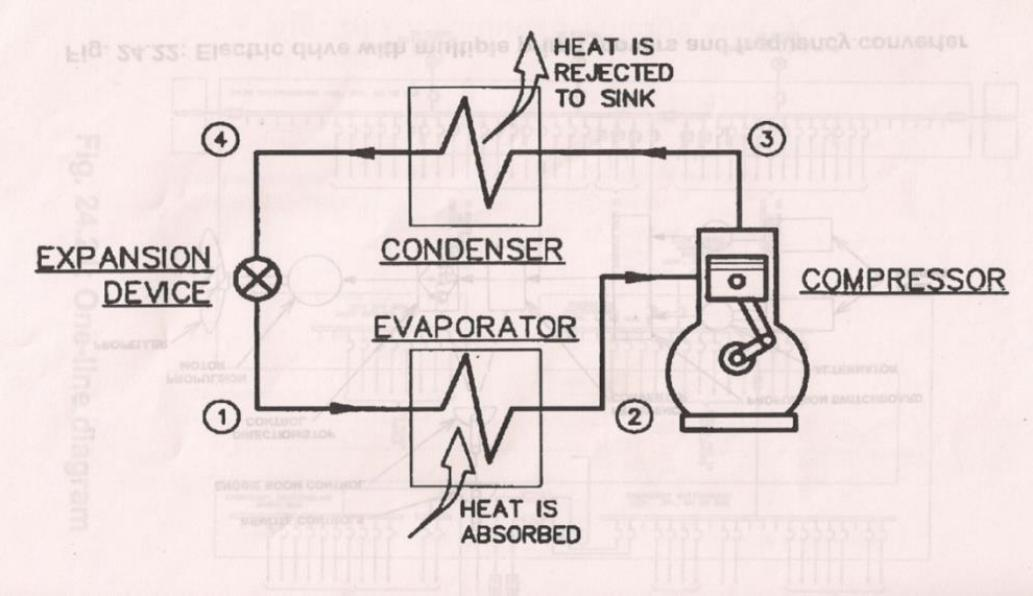

In [7]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

In [15]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [8]:
GROQ_API_KEY = os.getenv('GROQ_API_KEY')
if GROQ_API_KEY:
    print("Groq Api Key Found")
else:
    print("Groq Api Key Not Found")

Groq Api Key Found


In [20]:
# prompt_text = """
# You are an assistant tasked with summarizing tables and text.
# Give a concise summary of the table or text.

# Respond only with the summary, no additionnal comment.
# Do not start your message by saying "Here is a summary" or anything like that.
# Just give the summary as it is.

# Table or text chunk: {element}

# """
# prompt = ChatPromptTemplate.from_template(prompt_text)

# # Summary chain
# model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant", api_key=GROQ_API_KEY)
# summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [22]:
import os
from google import genai

# Ensure your GOOGLE_API_KEY is set in your environment or passed here.
# The client automatically picks it up from the GOOGLE_API_KEY environment variable.
try:
    client = genai.Client()
except Exception as e:
    print(f"Error initializing client: {e}")
    print("Please make sure your GOOGLE_API_KEY environment variable is set.")
    exit()

print("--- Available Gemini Models ---")

for model in client.models.list():
    # Filter out models you typically won't use directly (like embedding or multimodal)
    if "gemini" in model.name:
        print(f"Model Name: **{model.name}**")
        print(f"  Description: {model.description.split('.')[0]}.")
        # print(f"  Input Modalities: {model.input_methods}")
        print("-" * 20)

--- Available Gemini Models ---
Model Name: **models/gemini-2.5-pro-preview-03-25**
  Description: Gemini 2.
--------------------
Model Name: **models/gemini-2.5-flash-preview-05-20**
  Description: Preview release (April 17th, 2025) of Gemini 2.
--------------------
Model Name: **models/gemini-2.5-flash**
  Description: Stable version of Gemini 2.
--------------------
Model Name: **models/gemini-2.5-flash-lite-preview-06-17**
  Description: Preview release (June 11th, 2025) of Gemini 2.
--------------------
Model Name: **models/gemini-2.5-pro-preview-05-06**
  Description: Preview release (May 6th, 2025) of Gemini 2.
--------------------
Model Name: **models/gemini-2.5-pro-preview-06-05**
  Description: Preview release (June 5th, 2025) of Gemini 2.
--------------------
Model Name: **models/gemini-2.5-pro**
  Description: Stable release (June 17th, 2025) of Gemini 2.
--------------------
Model Name: **models/gemini-2.0-flash-exp**
  Description: Gemini 2.
--------------------
Model Nam

In [9]:
import os
from dotenv import load_dotenv

# Load the keys from .env file
load_dotenv()

# 🚨 THE FIX: Get the key AND set it back into os.environ with the correct name
# We assume your .env file now uses GOOGLE_API_KEY
google_key = os.getenv("GEMINI_API_KEY")

if google_key:
    # 🌟 CRITICAL STEP: Make the key accessible to the SDK 🌟
    os.environ["GEMINI_API_KEY"] = google_key 
    print("API Key successfully set in os.environ.")
else:
    print("No Api Key Found")

# --- Now run your LangChain setup ---
# It should now work because the ChatGoogleGenerativeAI class will find 
# os.environ["GOOGLE_API_KEY"]

No Api Key Found


✅ API Key is working successfully!
Response: API Key Works!


In [10]:
import os
from dotenv import load_dotenv

# Load the keys from .env file
load_dotenv()

# We assume your .env file now uses GOOGLE_API_KEY, but if it still uses GEMINI_API_KEY, 
# you MUST change it in your .env file for simplicity.
google_key_value = os.getenv("GOOGLE_API_KEY") 
if google_key_value is None:
    # Fallback in case your .env file is named GEMINI_API_KEY
    google_key_value = os.getenv("GEMINI_API_KEY")

if google_key_value:
    # 🌟 CRITICAL STEP: Always set the key using the CORRECT name for the SDK 🌟
    os.environ["GOOGLE_API_KEY"] = google_key_value 
    print("API Key successfully set as GOOGLE_API_KEY in os.environ.")
else:
    print("No Api Key Found")

API Key successfully set as GOOGLE_API_KEY in os.environ.


In [11]:
# --- Assuming the block above was run successfully ---

import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

# Get the key from the environment (it should be set now)
google_key = os.getenv("GOOGLE_API_KEY") 

if not google_key:
    # If this prints, go back and fix the setting block and your .env file!
    print("FATAL: GOOGLE_API_KEY not found in environment for explicit use.")
    exit()

# 🚨 Pass the key using the 'google_api_key' parameter
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    google_api_key=google_key # <--- This will now contain the actual key string!
)

# Simple text invocation
result = llm.invoke("what was the core idea of attention mechanism")
print(result.content)

c:\miniconda\envs\pdf_quiz\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


The core idea of the attention mechanism is to allow a neural network to **dynamically focus on the most relevant parts of its input sequence** when processing or generating an output, rather than trying to compress all information into a single fixed-size representation.

Here's a breakdown:

1.  **The Problem it Solved:**
    Traditional sequence models (like RNNs or LSTMs without attention) had to encode an entire input sequence (e.g., a long sentence) into a single, fixed-size "context vector." This created an **information bottleneck**, especially for long sequences, as it was very difficult to retain all the important details. Information from earlier parts of the sequence could get "forgotten" or diluted by the time the model reached the end.

2.  **The Core Idea (How Attention Works):**
    Instead of trying to squeeze everything into one bottleneck, attention enables the model, at each step of producing an output, to:
    *   **Look back at all input elements.**
    *   **Calc

In [16]:
%pip install --upgrade langchain-google-genai langchain-core

  Using cached langchain_core-1.0.3-py3-none-any.whl.metadata (3.5 kB)
Using cached langchain_core-1.0.3-py3-none-any.whl (469 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.3 which is incompatible.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.


In [18]:
%pip install --upgrade "langchain-google-genai==2.1.9"


  Using cached langchain_google_genai-2.1.9-py3-none-any.whl.metadata (7.2 kB)
  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
  Using cached langchain_core-0.3.79-py3-none-any.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 672.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 672.2 kB/s eta 0:00:02
   ---------------------- ----------------- 0.8/1.4 MB 658.7 kB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 658.7 kB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 637.3 kB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.4 MB 637.3 kB/s eta 0:00:01
   ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-classic 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.
langchain-community 0.4.1 requires langchain-core<2.0.0,>=1.0.1, but you have langchain-core 0.3.79 which is incompatible.
langchain-groq 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
langchain-openai 1.0.2 requires langchain-core<2.0.0,>=1.0.2, but you have langchain-core 0.3.79 which is incompatible.
langgraph-prebuilt 1.0.2 requires langchain-core>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.


In [12]:
# 💡 FIX: Use the correct class name for the chat model
from langchain_google_genai import ChatGoogleGenerativeAI 
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""

google_key = os.getenv("GOOGLE_API_KEY")
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
# 💡 FIX: Instantiate with the correct class name
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash", 
    temperature=0.5,
    google_api_key=google_key
    # The GOOGLE_API_KEY environment variable should handle authentication.
)
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [13]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
# tables_html = [table.metadata.text_as_html for table in tables]
# table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [14]:
text_summaries

['This index covers the principles of refrigeration and air conditioning, including definitions, purposes, and various system types. It details the layout of refrigeration systems like vapor compression and direct expansion, and describes components such as compressors, condensers, evaporators, valves, and safety devices. The index also outlines refrigeration systems specifically for ships, including domestic cold rooms, provision plants, reefer ships, cargo refrigeration (brine, air circulation, containers), insulating materials, and reliquefaction plants for LNG/LPG carriers.',
 'This document outlines chapters covering the maintenance of different temperatures, including food spoilage, cargo control, and storage conditions for various perishables. It also details refrigerants, their properties, and classification; compressor lubrication systems; methods for charging refrigerant and purging the system; and various control systems in refrigeration circuits. Further topics include mari

In [15]:
import os
from langchain_google_genai import ChatGoogleGenerativeAI # Use this class name
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# --- Authentication Setup (Ensuring the key is available) ---
# Assuming you successfully loaded and set GOOGLE_API_KEY in a previous cell
GOOGLE_KEY = os.getenv("GOOGLE_API_KEY")

if not GOOGLE_KEY:
    # This should not happen if previous steps were successful, but is a safe check
    raise ValueError("GOOGLE_API_KEY environment variable not set.")
# -----------------------------------------------------------

prompt_template = """Describe the image in detail. For context, this image is from a marine refrigeration and air conditioning technical manual used in maritime engineering education. Be specific about graphs, such as bar plots and any other components given inside an image."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                # This Base64 structure is fully compatible with Gemini
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

# 💡 THE CHANGE: Use ChatGoogleGenerativeAI and pass the key explicitly
chain = prompt | ChatGoogleGenerativeAI(
    model="gemini-2.5-flash", 
    google_api_key=GOOGLE_KEY # Pass the variable to bypass env visibility issues
) | StrOutputParser()


# The batch invocation remains the same
image_summaries = chain.batch(images)

In [16]:
image_summaries

['This image presents a detailed "one-line diagram" of a standard vapor-compression refrigeration cycle, typical for a marine refrigeration and air conditioning technical manual. The diagram illustrates the flow of refrigerant through four main components, highlighting the points of heat absorption and rejection.\n\nHere\'s a detailed breakdown:\n\n**Overall Layout and Components:**\nThe diagram shows a closed-loop system with four primary components arranged in a rectangular flow path:\n1.  **Compressor:** Located at the bottom right.\n2.  **Condenser:** Positioned at the top center.\n3.  **Expansion Device:** Situated at the left center.\n4.  **Evaporator:** Placed at the bottom center.\n\nConnecting lines with arrows indicate the direction of refrigerant flow through the cycle. The cycle progresses clockwise from the evaporator outlet to the compressor, condenser, expansion device, and back to the evaporator inlet.\n\n**Detailed Description of Each Component and Flow Path:**\n\n*   

In [17]:
print(image_summaries[0])

This image presents a detailed "one-line diagram" of a standard vapor-compression refrigeration cycle, typical for a marine refrigeration and air conditioning technical manual. The diagram illustrates the flow of refrigerant through four main components, highlighting the points of heat absorption and rejection.

Here's a detailed breakdown:

**Overall Layout and Components:**
The diagram shows a closed-loop system with four primary components arranged in a rectangular flow path:
1.  **Compressor:** Located at the bottom right.
2.  **Condenser:** Positioned at the top center.
3.  **Expansion Device:** Situated at the left center.
4.  **Evaporator:** Placed at the bottom center.

Connecting lines with arrows indicate the direction of refrigerant flow through the cycle. The cycle progresses clockwise from the evaporator outlet to the compressor, condenser, expansion device, and back to the evaporator inlet.

**Detailed Description of Each Component and Flow Path:**

*   **Compressor:**
  

In [17]:
print(image_summaries[0])

This image is a detailed schematic diagram illustrating a **vapor-compression refrigeration cycle**, a common thermodynamic system. It's a black and white line drawing on a light, slightly beige background, with some faint, blurry background text indicating it's likely a scan or photograph from a larger document.

The diagram shows four main components connected in a closed loop by lines representing piping, with arrows indicating the direction of refrigerant flow. There are four numbered points in circles (1, 2, 3, 4) marking specific states or locations in the cycle.

Here's a detailed breakdown of the components and the flow:

1.  **Compressor:** Located on the right side of the diagram, in the lower-right quadrant.
    *   **Visual:** It's depicted as a rounded, bulbous base with a rectangular section on top. Inside, there's a simplified illustration of a piston (a small rectangle with a circle) connected by a rod to a crankshaft (a curved line with a small circle at its pivot poin

In [ ]:
# %pip install -U langchain langchain-community langchain-google-genai chromadb


Note: you may need to restart the kernel to use updated packages.


In [18]:
import uuid
import os
import json
# from langchain_community.vectorstores import Chroma
# # from langchain.storage import InMemoryStore
# from langchain_core.stores import InMemoryStore
# from langchain_core.documents import Document
# from langchain_google_genai import GoogleGenerativeAIEmbeddings
# from langchain.retrievers.multi_vector import MultiVectorRetriever
# # from langchain_community.retrievers import M
# # from langchain.retrivers.multi_vector import 
# # from langchain.

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.vectorstores import Chroma
from langchain_core.stores import InMemoryStore
from langchain_core.documents import Document
from langchain_google_genai import GoogleGenerativeAIEmbeddings


# Define the persistence paths
CHROMA_PATH = "./chroma_db_final"
DOCSTORE_PATH = "./docstore_final.json" # File to save parent documents

# Ensure the Chroma path exists
if not os.path.exists(CHROMA_PATH):
    os.makedirs(CHROMA_PATH)

# The vectorstore to use to index the child chunks
# 💡 IMPORTANT: Use a Gemini Embedding function, as OpenAIEmbeddings requires an OpenAI key
vectorstore = Chroma(
    collection_name="multi_modal_final_rag", 
    embedding_function=GoogleGenerativeAIEmbeddings(model='gemini-embedding-001'), # Changed to Gemini Embeddings
    persist_directory=CHROMA_PATH # 🌟 CHROMA SAVES HERE 🌟
)

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

# ... (Your logic to add texts, tables, and images remains the same) ...

doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
# table_ids = [str(uuid.uuid4()) for _ in tables]
# summary_tables = [
#     Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
# ]
# retriever.vectorstore.add_documents(summary_tables)
# retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))



# ----------------------------------------------------------------------
# 🌟 STEP 2: Save the Parent Documents (from InMemoryStore) to a file 🌟
# ----------------------------------------------------------------------

# 1. Collect all parent documents from the InMemoryStore
# The InMemoryStore's underlying storage is a dictionary accessible via its `store` attribute.
# The keys are the doc_ids and the values are the parent documents (text, tables, or image base64).
parent_docs_to_save = dict(retriever.docstore.store)

# 2. Save the dictionary to a JSON file
with open(DOCSTORE_PATH, "w", encoding="utf-8") as f:
    json.dump(parent_docs_to_save, f, ensure_ascii=False, default=str, indent=2)

# 3. Trigger Chroma persistence (optional, as it often saves on additions, but good practice)
vectorstore.persist()

print(f"Data saved: Chroma DB to {CHROMA_PATH} and Document Store to {DOCSTORE_PATH}")

C:\Users\IR - CP 15\AppData\Local\Temp\ipykernel_23360\1089557338.py:31: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


Data saved: Chroma DB to ./chroma_db_final and Document Store to ./docstore_final.json


C:\Users\IR - CP 15\AppData\Local\Temp\ipykernel_23360\1089557338.py:89: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


Using Open source embeddings 

In [55]:
import uuid
import os
import json
# from langchain_community.vectorstores import Chroma
# # from langchain.storage import InMemoryStore
# from langchain_core.stores import InMemoryStore
# from langchain_core.documents import Document
# from langchain_google_genai import GoogleGenerativeAIEmbeddings
# from langchain.retrievers.multi_vector import MultiVectorRetriever
# # from langchain_community.retrievers import M
# # from langchain.retrivers.multi_vector import 
# # from langchain.

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.vectorstores import Chroma
from langchain_core.stores import InMemoryStore
from langchain_core.documents import Document
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from sentence_transformers import SentenceTransformer
from langchain.embeddings.base import Embeddings

class SentenceTransformerEmbeddings(Embeddings):
    def __init__(self, model_name: str):
        self.model = SentenceTransformer(model_name, trust_remote_code=True)

    def embed_documents(self, texts):
        # Return a list of vectors (one per document)
        return self.model.encode(texts, show_progress_bar=True, convert_to_numpy=True).tolist()

    def embed_query(self, text):
        # Return a single vector for the query
        return self.model.encode(text, convert_to_numpy=True).tolist()


# embedding_function = NomicEmbeddings(model="nomic-embed-text-v1.5")
embedding_function = SentenceTransformerEmbeddings('nomic-ai/nomic-embed-text-v1.5')

# Define the persistence paths
CHROMA_PATH = "./chroma_db_nomic"
DOCSTORE_PATH = "./docstore_nomic.json" # File to save parent documents

# Ensure the Chroma path exists
if not os.path.exists(CHROMA_PATH):
    os.makedirs(CHROMA_PATH)

# The vectorstore to use to index the child chunks
# 💡 IMPORTANT: Use a Gemini Embedding function, as OpenAIEmbeddings requires an OpenAI key
vectorstore = Chroma(
    collection_name="multi_modal_rag", 
    embedding_function=embedding_function, # Changed to Gemini Embeddings
    persist_directory=CHROMA_PATH # 🌟 CHROMA SAVES HERE 🌟
)

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

# ... (Your logic to add texts, tables, and images remains the same) ...

doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
# table_ids = [str(uuid.uuid4()) for _ in tables]
# summary_tables = [
#     Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
# ]
# retriever.vectorstore.add_documents(summary_tables)
# retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))



# ----------------------------------------------------------------------
# 🌟 STEP 2: Save the Parent Documents (from InMemoryStore) to a file 🌟
# ----------------------------------------------------------------------

# 1. Collect all parent documents from the InMemoryStore
# The InMemoryStore's underlying storage is a dictionary accessible via its `store` attribute.
# The keys are the doc_ids and the values are the parent documents (text, tables, or image base64).
parent_docs_to_save = dict(retriever.docstore.store)

# 2. Save the dictionary to a JSON file
with open(DOCSTORE_PATH, "w", encoding="utf-8") as f:
    json.dump(parent_docs_to_save, f, ensure_ascii=False, default=str, indent=2)

# 3. Trigger Chroma persistence (optional, as it often saves on additions, but good practice)
vectorstore.persist()

print(f"Data saved: Chroma DB to {CHROMA_PATH} and Document Store to {DOCSTORE_PATH}")

<All keys matched successfully>
Batches: 100%|██████████| 2/2 [00:41<00:00, 20.57s/it]

Data saved: Chroma DB to ./chroma_db_nomic and Document Store to ./docstore_nomic.json


In [56]:
import json
import os
from langchain_community.vectorstores import Chroma
from langchain_core.stores import InMemoryStore
from langchain_core.documents import Document
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.embeddings.base import Embeddings
from sentence_transformers import SentenceTransformer

# -------------------------------
# 1️⃣ Custom wrapper for SentenceTransformer
# -------------------------------
class SentenceTransformerEmbeddings(Embeddings):
    def __init__(self, model_name: str):
        self.model = SentenceTransformer(model_name, trust_remote_code=True)

    def embed_documents(self, texts):
        return self.model.encode(texts, show_progress_bar=False, convert_to_numpy=True).tolist()

    def embed_query(self, text):
        return self.model.encode(text, convert_to_numpy=True).tolist()

# -------------------------------
# 2️⃣ Define paths
# -------------------------------
CHROMA_PATH = "./chroma_db_nomic"  # use same folder used during saving
DOCSTORE_PATH = "./docstore_nomic.json"  # same filename used during saving

# -------------------------------
# 3️⃣ Rebuild embeddings
# -------------------------------
embedding_function = SentenceTransformerEmbeddings("nomic-ai/nomic-embed-text-v1.5")

# -------------------------------
# 4️⃣ Rebuild vectorstore
# -------------------------------
vectorstore = Chroma(
    collection_name="multi_modal_rag",
    embedding_function=embedding_function,
    persist_directory=CHROMA_PATH,
)

# -------------------------------
# 5️⃣ Rebuild docstore
# -------------------------------
store = InMemoryStore()
with open(DOCSTORE_PATH, "r", encoding="utf-8") as f:
    store.store = json.load(f)

# -------------------------------
# 6️⃣ Rebuild retriever
# -------------------------------
retriever_rebuild_nomic = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key="doc_id",
)

print("✅ Retriever reloaded successfully with Nomic embeddings!")


<All keys matched successfully>


✅ Retriever reloaded successfully with Nomic embeddings!


In [57]:
import os
from base64 import b64decode
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ---- Helper function to separate base64 images and text ----
def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            # if decoding succeeds, it's an image
            b64decode(doc)
            b64.append(doc)
        except Exception:
            text.append(doc)
    return {"images": b64, "texts": text}


# ---- Function to build the multimodal prompt ----
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            # if text elements are Document objects
            if hasattr(text_element, "page_content"):
                context_text += text_element.page_content
            elif hasattr(text_element, "text"):
                context_text += text_element.text
            else:
                context_text += str(text_element)

    # Base text part of prompt
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and images.

    Context: {context_text}
    Question: {user_question}
    """

    # The prompt content (text + base64 images)
    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    # Return ChatPromptTemplate
    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


# ---- Define Gemini model ----
# Make sure GOOGLE_API_KEY is set in your environment
# e.g. export GOOGLE_API_KEY="your-key"
llm2 = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # or gemini-1.5-pro for better reasoning
    temperature=0.3,
    google_api_key=os.getenv("GOOGLE_API_KEY"),
)


# ---- Define the runnable chain ----
chain_rebuild = (
    {
        "context": retriever_rebuild_nomic | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | llm2
    | StrOutputParser()
)


# ---- Optional: Chain that also returns sources ----
chain_with_sources_rebuild = (
    {
        "context": retriever_rebuild_nomic | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnablePassthrough().assign(
        response=(RunnableLambda(build_prompt) | llm2 | StrOutputParser())
    )
)

print("✅ Gemini multimodal chain ready!")


✅ Gemini multimodal chain ready!


In [60]:
docs = retriever_rebuild_nomic.invoke("psychrometric chart")

print(len(docs), "documents retrieved")

first_doc = docs[0]

if hasattr(first_doc, "page_content"):
    print(first_doc.page_content[:500])
elif isinstance(first_doc, str):
    print(first_doc[:500])
else:
    print(str(first_doc)[:500])


4 documents retrieved
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANGBccDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi


In [66]:
docs = retriever_rebuild_nomic.invoke("ZONE CONTROL SYSTEM ")
print(len(docs), "documents retrieved")

first_doc = docs[0]

if isinstance(first_doc, str):
    if first_doc.startswith("/9j/"):  # base64 image prefix
        print("🖼️ This is an image (base64-encoded)")
        # You can decode it and save or display it:
        import base64
        from PIL import Image
        from io import BytesIO
        
        img_data = base64.b64decode(first_doc)
        img = Image.open(BytesIO(img_data))
        img.show()
    else:
        print("📝", first_doc[:500])
else:
    print("📝", first_doc.page_content[:500])


4 documents retrieved
📝 Chapter — XII (AIR CONDITIONING SYSTEMS)

TYPES OF AIR CONDITIONING SYSTEMS

Air conditioning systems may be divided into following two main classes.

Central unit type in which the air is distributed to a group of spaces through ducting.

Central unit type is the most widely used, available in following alternatives, developed to meet the varying requirements of each of the spaces being conditioned.

Zone control system

DWDRWNPR

Single duct system

Double duct system

Reheat system

Self-cont


In [58]:

import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = retriever_rebuild_nomic.invoke("explain what is PSYCHROMETRIC CHART and how dry bulb temperature scale is along abscissa")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    # Handle both Document and string types
    if hasattr(text, "page_content"):
        print(text.page_content)
        page_number = getattr(text.metadata, "page_number", None)
        if page_number is not None:
            print("Page number:", page_number)
    elif isinstance(text, str):
        print(text)
    else:
        print(str(text))
    
    print("\n" + "-" * 50 + "\n")

print("🖼️ Context Images:")
for image in response['context']['images']:
    try:
        display_base64_image(image)
    except Exception as e:
        print(f"⚠️ Could not display image: {e}")


TypeError: list indices must be integers or slices, not str

In [41]:
from langchain_community.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain_core.documents import Document
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever
import json

CHROMA_PATH = "./chroma_db_latest"
DOCSTORE_PATH = "./docstore.json"

# Rebuild vectorstore
vectorstore = Chroma(
    collection_name="multi_modal_rag",
    embedding_function=GoogleGenerativeAIEmbeddings(model="gemini-embedding-001"),
    persist_directory=CHROMA_PATH,
)

# Rebuild docstore
store = InMemoryStore()
with open(DOCSTORE_PATH, "r", encoding="utf-8") as f:
    store.store = json.load(f)

# Rebuild retriever
retriever_rebuild = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key="doc_id",
)

print("✅ Retriever reloaded successfully!")


✅ Retriever reloaded successfully!


Generating using rebuilding and fetching from the locall data

In [42]:
import os
from base64 import b64decode
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ---- Helper function to separate base64 images and text ----
def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            # if decoding succeeds, it's an image
            b64decode(doc)
            b64.append(doc)
        except Exception:
            text.append(doc)
    return {"images": b64, "texts": text}


# ---- Function to build the multimodal prompt ----
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            # if text elements are Document objects
            if hasattr(text_element, "page_content"):
                context_text += text_element.page_content
            elif hasattr(text_element, "text"):
                context_text += text_element.text
            else:
                context_text += str(text_element)

    # Base text part of prompt
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and images.

    Context: {context_text}
    Question: {user_question}
    """

    # The prompt content (text + base64 images)
    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    # Return ChatPromptTemplate
    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


# ---- Define Gemini model ----
# Make sure GOOGLE_API_KEY is set in your environment
# e.g. export GOOGLE_API_KEY="your-key"
llm1 = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # or gemini-1.5-pro for better reasoning
    temperature=0.3,
    google_api_key=os.getenv("GOOGLE_API_KEY"),
)


# ---- Define the runnable chain ----
chain_rebuild = (
    {
        "context": retriever_rebuild | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | llm1
    | StrOutputParser()
)


# ---- Optional: Chain that also returns sources ----
chain_with_sources_rebuild = (
    {
        "context": retriever_rebuild | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnablePassthrough().assign(
        response=(RunnableLambda(build_prompt) | llm1 | StrOutputParser())
    )
)

print("✅ Gemini multimodal chain ready!")


✅ Gemini multimodal chain ready!


🧠 Response:
 A Psychrometric Chart is defined as a plot of humidity ratio (partial vapour pressure) to the base of dry bulb temperature. It is used to determine the state point of an air sample and obtain remaining data if any two properties are known. It also allows for the graphical representation of air conditioning processes like heating and humidification or cooling and dehumidification. The chart can be used to read parameters such as dry bulb temperature, wet bulb temperature, saturation temperature, relative humidity, absolute humidity, specific volume of air, partial pressure of water vapour, and specific enthalpy. This chart is made on the basis of standard air at a barometric pressure of 760 mm of Hg or 1.013 bar, 20°C, and 50% relative humidity.

The dry bulb temperature (t) scale is along the abscissa, and lines of constant dry bulb temperature extend straight up from the base of the chart.

📚 Context Texts:
HUMIDITY RATIO

It is defined as a ratio of mass of water vapour 

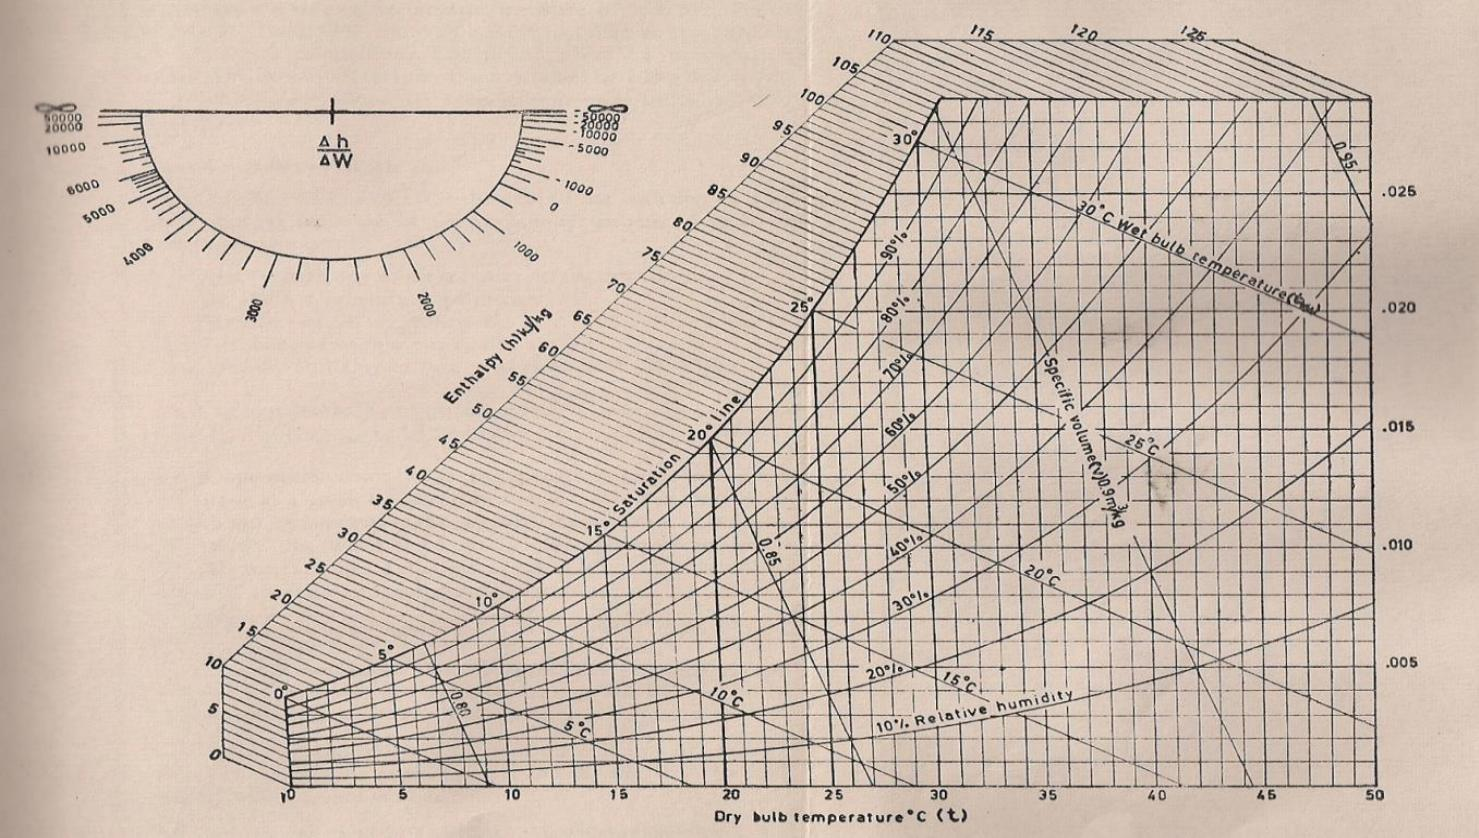

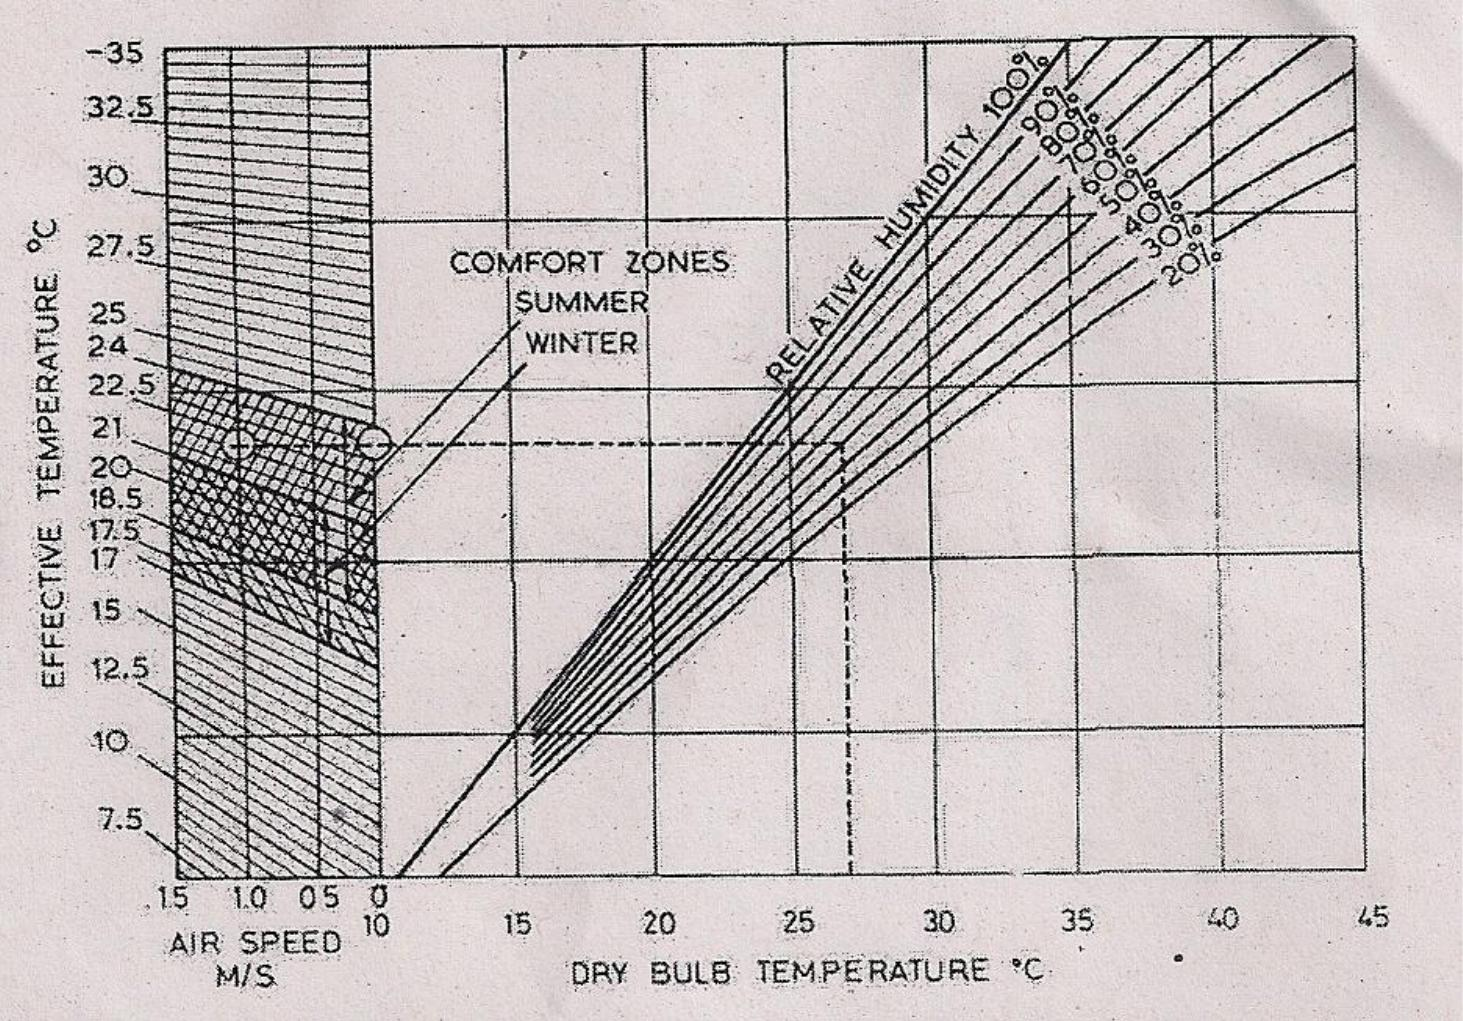

In [ ]:
# import base64
# from IPython.display import Image, display

# def display_base64_image(b64_str):
#     """Display base64 image in Jupyter or VSCode notebooks."""
#     image_bytes = base64.b64decode(b64_str)
#     display(Image(data=image_bytes))

# # Invoke the chain
# response = chain_with_sources_rebuild.invoke("explain MACHINERY SPACE VENTILATION in detail")

# # Print response text
# print("🧠 Response:\n", response['response'])

# print("\n📚 Context Texts:")
# for text in response['context']['texts']:
#     if hasattr(text, "page_content"):
#         print(text.page_content)
#     elif hasattr(text, "text"):
#         print(text.text)
#     else:
#         print(str(text))
    
#     # ✅ FIX: use getattr() instead of "in"
#     page_number = getattr(text.metadata, "page_number", None)
#     if page_number is not None:
#         print("Page number:", page_number)

#     print("\n" + "-" * 50 + "\n")


# print("🖼️ Context Images:")
# for image in response['context']['images']:
#     display_base64_image(image)



import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources_rebuild.invoke("explain what is PSYCHROMETRIC CHART and how dry bulb temperature scale is along abscissa")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    # Handle both Document and string types
    if hasattr(text, "page_content"):
        print(text.page_content)
        page_number = getattr(text.metadata, "page_number", None)
        if page_number is not None:
            print("Page number:", page_number)
    elif isinstance(text, str):
        print(text)
    else:
        print(str(text))
    
    print("\n" + "-" * 50 + "\n")

print("🖼️ Context Images:")
for image in response['context']['images']:
    try:
        display_base64_image(image)
    except Exception as e:
        print(f"⚠️ Could not display image: {e}")


In [20]:
docs = retriever.invoke(
    "tell me about air regrigeration system"
)

In [21]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

AIR REFRIGERATION SYSTEM

HOT COMPRESSED AIR AUXILARY PRIVE

In this system, air is used as working fluid which absorbs heat from low temperature and discharges to high temperature.

As air does not change phase during the cycle, its heat carrying capacity is very small in comparison to vapour compression system.

Air refrigeration systems were used in the past due to free availability of air but became obsolete due to it’s low coefficient of performance and high operational costs.

Air refrigeration system is now limited to aeroplanes where it is used for air conditioning of the

passenger compartment (25°C) and refrigeration for preservation of foods and drinks (-5°C) .

Basic components used in air refrigeration system are compressor, heat exchanger, expander and refrigerator as shown in the sketch.

Air at high pressure P2 and temperature Tq is expanded in the expansion cylinder to lower pressure P1 and temperature Ta which is lowest in the cycle.

Air leaving the expansion cylinde

In [19]:
import os
from base64 import b64decode
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ---- Helper function to separate base64 images and text ----
def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            # if decoding succeeds, it's an image
            b64decode(doc)
            b64.append(doc)
        except Exception:
            text.append(doc)
    return {"images": b64, "texts": text}


# ---- Function to build the multimodal prompt ----
def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            # if text elements are Document objects
            if hasattr(text_element, "page_content"):
                context_text += text_element.page_content
            elif hasattr(text_element, "text"):
                context_text += text_element.text
            else:
                context_text += str(text_element)

    # Base text part of prompt
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and images.

    Context: {context_text}
    Question: {user_question}
    """

    # The prompt content (text + base64 images)
    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    # Return ChatPromptTemplate
    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


# ---- Define Gemini model ----
# Make sure GOOGLE_API_KEY is set in your environment
# e.g. export GOOGLE_API_KEY="your-key"
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # or gemini-1.5-pro for better reasoning
    temperature=0.3,
    google_api_key=os.getenv("GOOGLE_API_KEY"),
)


# ---- Define the runnable chain ----
chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | llm
    | StrOutputParser()
)


# ---- Optional: Chain that also returns sources ----
chain_with_sources = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnablePassthrough().assign(
        response=(RunnableLambda(build_prompt) | llm | StrOutputParser())
    )
)

print("✅ Gemini multimodal chain ready!")


✅ Gemini multimodal chain ready!


In [20]:
response = chain_with_sources.invoke(
    "tell me about air regrigeration system"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

Response: An air refrigeration system uses air as the working fluid. Unlike vapor compression systems, air does not change phase during the cycle, which results in a very small heat carrying capacity.

Historically, these systems were used due to the free availability of air but became obsolete because of their low coefficient of performance (COP) and high operational costs.

Currently, air refrigeration systems are primarily limited to aeroplanes. In this application, they are used for:
*   Air conditioning the passenger compartment (to 25°C).
*   Refrigeration for the preservation of foods and drinks (to -5°C).

The basic components of an air refrigeration system include a compressor, heat exchanger, expander, and refrigerator.

**How it works:**
1.  Air at high pressure (P2) and temperature (Tq) is expanded in an expansion cylinder to a lower pressure (P1) and the lowest temperature in the cycle (Ta).
2.  This cold, low-pressure air (Ta, P1) flows through a refrigerator chamber, abs

🧠 Response:
 The Vapour Absorption Refrigeration System (VARS) fundamentally differs from a vapour compression system in its method of compressing the refrigerant. Instead of a mechanical compressor, it uses an absorber, a generator, and a pump.

Two common combinations are used:
1.  **Ammonia gas into water:** Used for refrigeration plants.
2.  **Water vapour into Lithium Bromide:** Used for air conditioning, as Lithium Bromide is non-toxic. This combination is restricted to systems above the freezing point of water.

Here's how the Ammonia-water system (as depicted in the diagram) operates:

1.  **Generator (NH3 generator):** Strong ammonia (NH3) solution is heated by an external source (qn(Th)). This causes ammonia vapour to be produced at high pressure, leaving the solution weak.
2.  **Rectifier:** Water vapour carried with the ammonia is removed in the rectifier, ensuring only dehydrated ammonia gas proceeds.
3.  **Condenser:** The high-pressure, dehydrated NH3 vapour is then cond

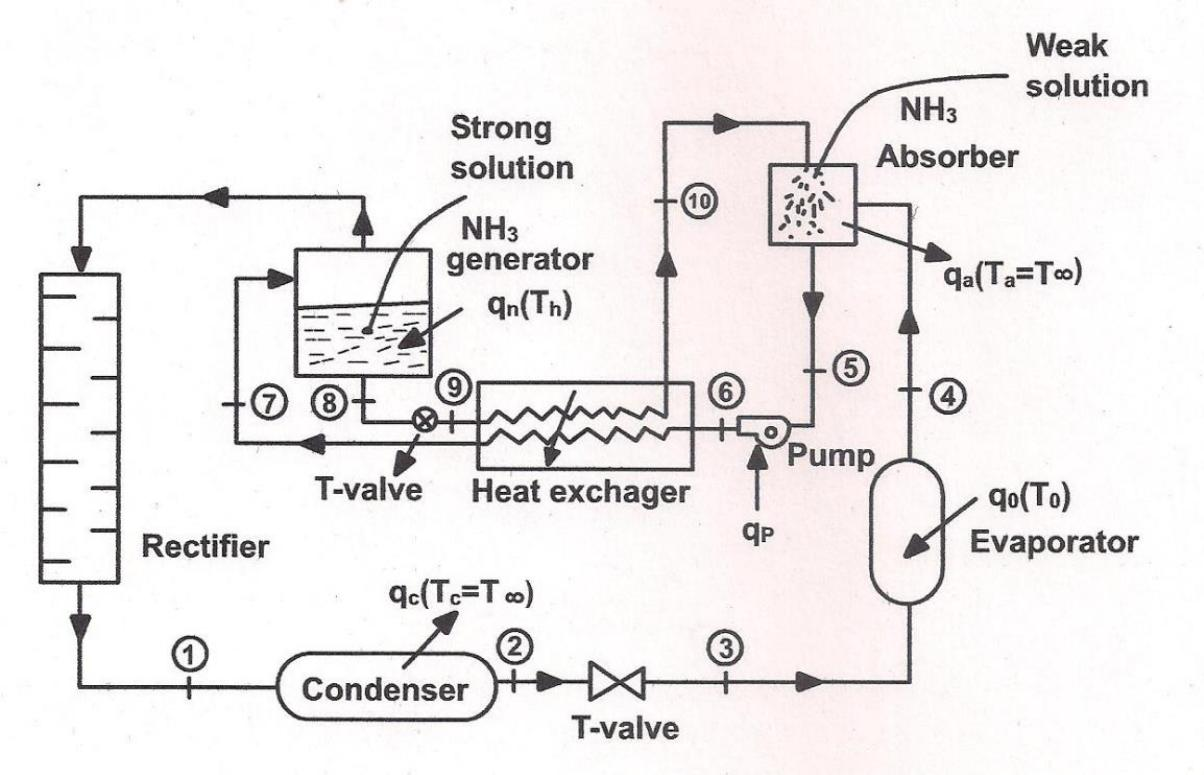

In [21]:
import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources.invoke("explain VAPOUR ABSORPTION REFRIGERATION SYSTEM ")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    if hasattr(text, "page_content"):
        print(text.page_content)
    elif hasattr(text, "text"):
        print(text.text)
    else:
        print(str(text))
    
    # ✅ FIX: use getattr() instead of "in"
    page_number = getattr(text.metadata, "page_number", None)
    if page_number is not None:
        print("Page number:", page_number)

    print("\n" + "-" * 50 + "\n")


print("🖼️ Context Images:")
for image in response['context']['images']:
    display_base64_image(image)


🧠 Response:
 The Shell & Tube Type Evaporator is used for cooling the secondary refrigerant. In this system, the primary refrigerant passes through the tubes, and the secondary refrigerant is passed over the tube bank. The refrigerant is sprayed into the tubes to ensure an even distribution through all of them, and any oil present is not sprayed and drains away. This type of evaporator incorporates two features to improve heat transfer efficiency.

📚 Context Texts:
FIN TYPE EVAPORATOR

erat i) i LUDAd SAdDERANERORECUICAIL TUULRLEUASERESRRREREREL EOLA! au DEUS PASGREROREMBOTR RISE CT ERT’ Me padguSMbeeReARBAy LILA

* Evaporator is a heat exchanger through which the cold refrigerant flows to absorb heat from the surrounding air.

* In the evaporator, the low pressure liquid refrigerant boils at low temperature as it absorbs heat from air.

* The evaporated refrigerant is then drawn out of evaporator through the compressor.

To improve the heat transfer, the evaporator tubes are usually f

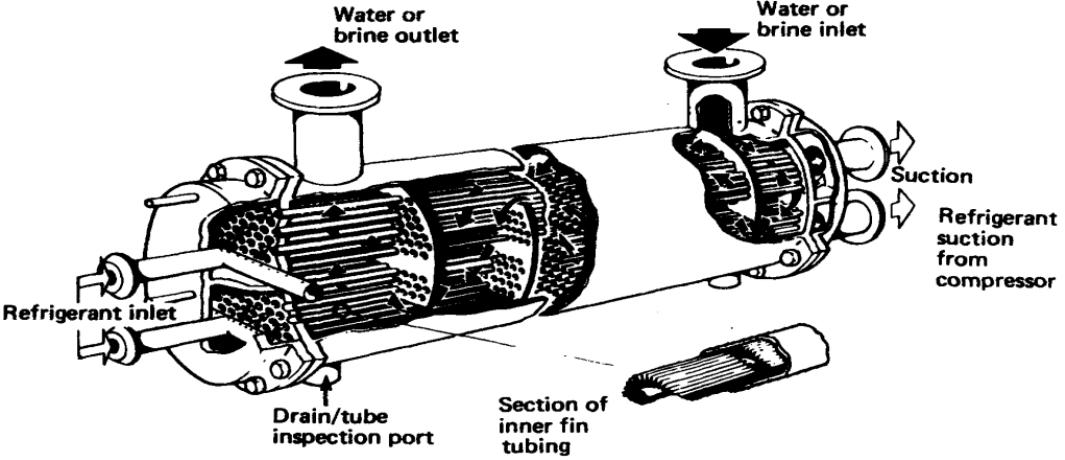

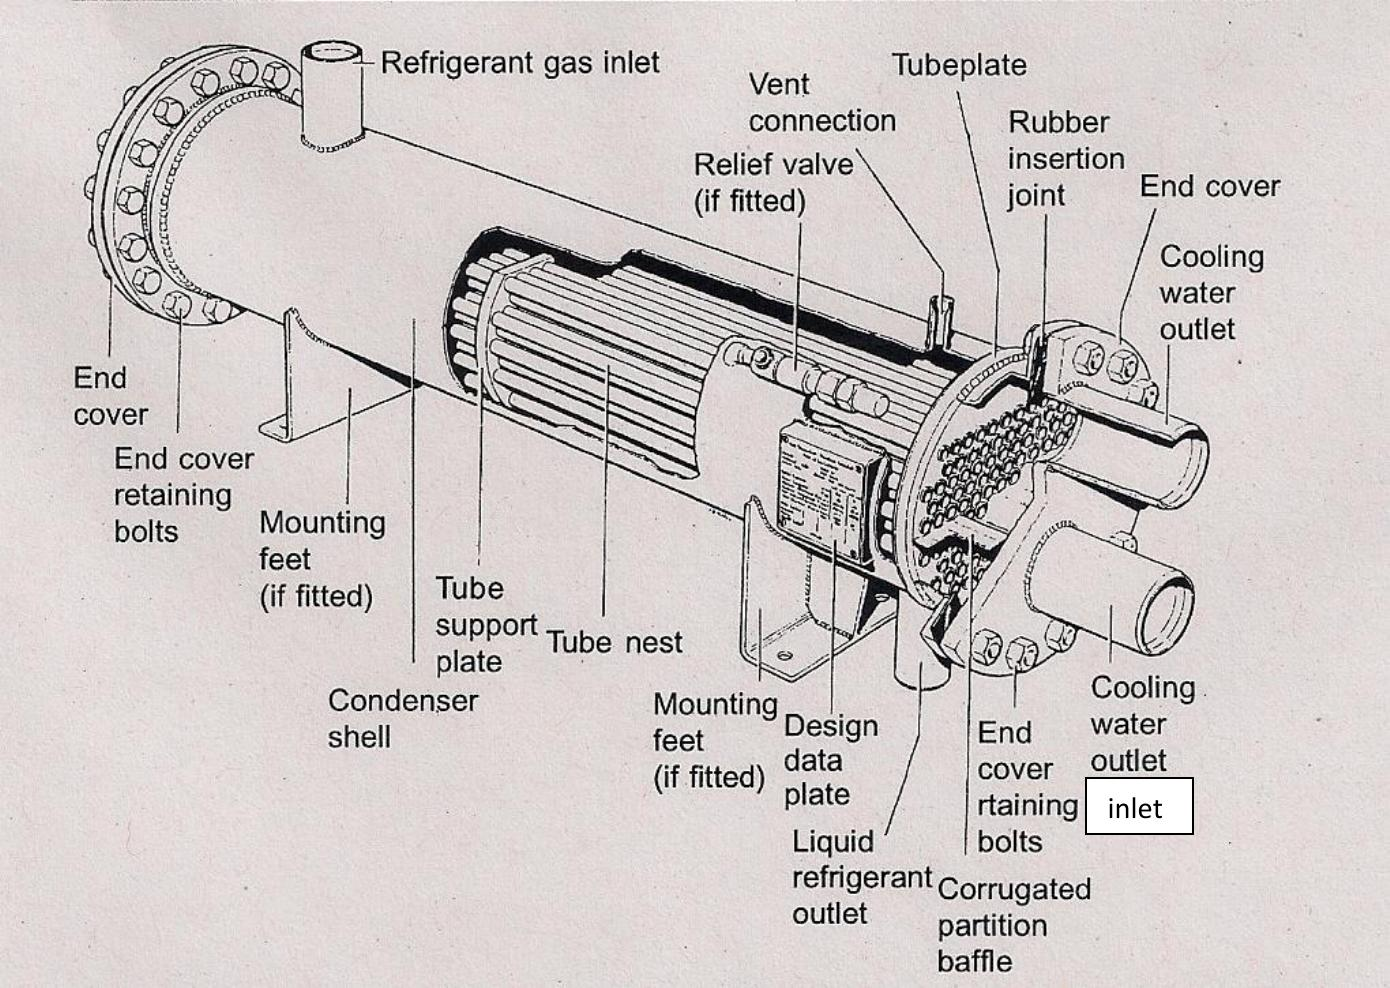

In [34]:
import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources.invoke("explain SHELL & TUBE TYPE EVAPORATOR")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    if hasattr(text, "page_content"):
        print(text.page_content)
    elif hasattr(text, "text"):
        print(text.text)
    else:
        print(str(text))
    
    # ✅ FIX: use getattr() instead of "in"
    page_number = getattr(text.metadata, "page_number", None)
    if page_number is not None:
        print("Page number:", page_number)

    print("\n" + "-" * 50 + "\n")


print("🖼️ Context Images:")
for image in response['context']['images']:
    display_base64_image(image)


🧠 Response:
 The Shell & Tube Type Evaporator is used for cooling the secondary refrigerant. In this system, the primary refrigerant passes through the tubes, and the secondary refrigerant is passed over the tube bank. The refrigerant is sprayed into the tubes to ensure an even distribution through all of them. This process also ensures that any oil present is not sprayed and drains away. This type of evaporator incorporates two features to improve heat transfer efficiency.

📚 Context Texts:
FIN TYPE EVAPORATOR

erat i) i LUDAd SAdDERANERORECUICAIL TUULRLEUASERESRRREREREL EOLA! au DEUS PASGREROREMBOTR RISE CT ERT’ Me padguSMbeeReARBAy LILA

* Evaporator is a heat exchanger through which the cold refrigerant flows to absorb heat from the surrounding air.

* In the evaporator, the low pressure liquid refrigerant boils at low temperature as it absorbs heat from air.

* The evaporated refrigerant is then drawn out of evaporator through the compressor.

To improve the heat transfer, the eva

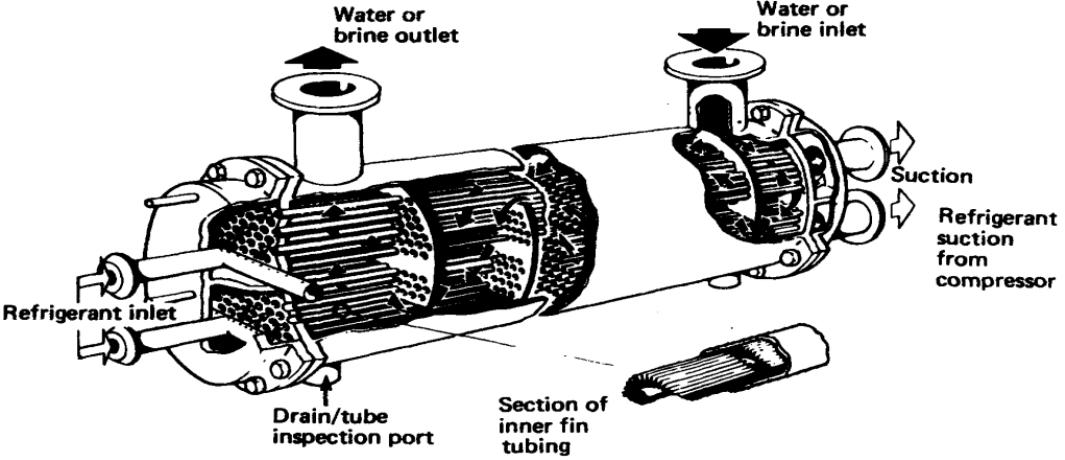

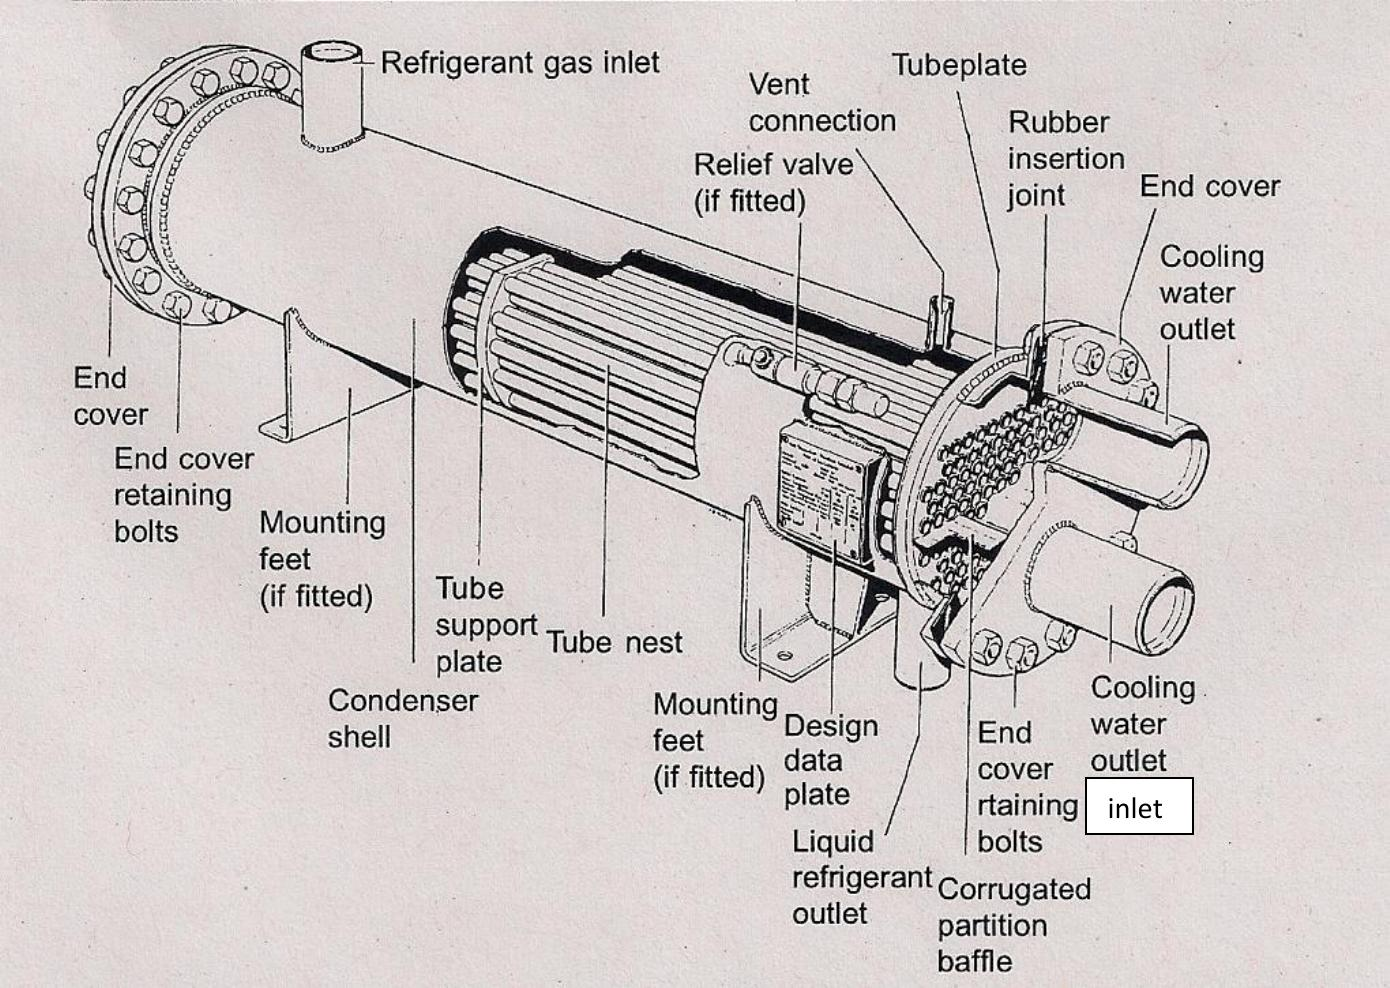

In [22]:
import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources.invoke("explain SHELL & TUBE TYPE EVAPORATOR")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    if hasattr(text, "page_content"):
        print(text.page_content)
    elif hasattr(text, "text"):
        print(text.text)
    else:
        print(str(text))
    
    # ✅ FIX: use getattr() instead of "in"
    page_number = getattr(text.metadata, "page_number", None)
    if page_number is not None:
        print("Page number:", page_number)

    print("\n" + "-" * 50 + "\n")


print("🖼️ Context Images:")
for image in response['context']['images']:
    display_base64_image(image)


🧠 Response:
 The Single Duct System is an air conditioning system widely used on cargo ships.

Here's a breakdown of its characteristics and operation:

*   **Distribution:** It typically uses one or two central units to distribute conditioned air to multiple cabins or spaces through a single pipe or duct.
*   **Climate-Specific Operation:**
    *   **Warm Climates:** A mixture of fresh and re-circulated air is cooled and dehumidified as it passes over the cooling unit.
    *   **Cold Climates:** The air mixture is warmed and humidified, usually by steam.
*   **Temperature and Humidity Control:**
    *   At the central unit, the temperature and humidity of the air are controlled automatically.
    *   Within the conditioned space, control is achieved by varying the volume flow of air.

**Components (as labeled in the diagram):**
1.  Mixing box
2.  Fan
3.  Filter
4.  Cooler
5.  Pressure relief valve
6.  Humidifier
7.  Pre-heater
8.  Zone heaters
9.  Re heater
10. Plenums
11. Warmer air 

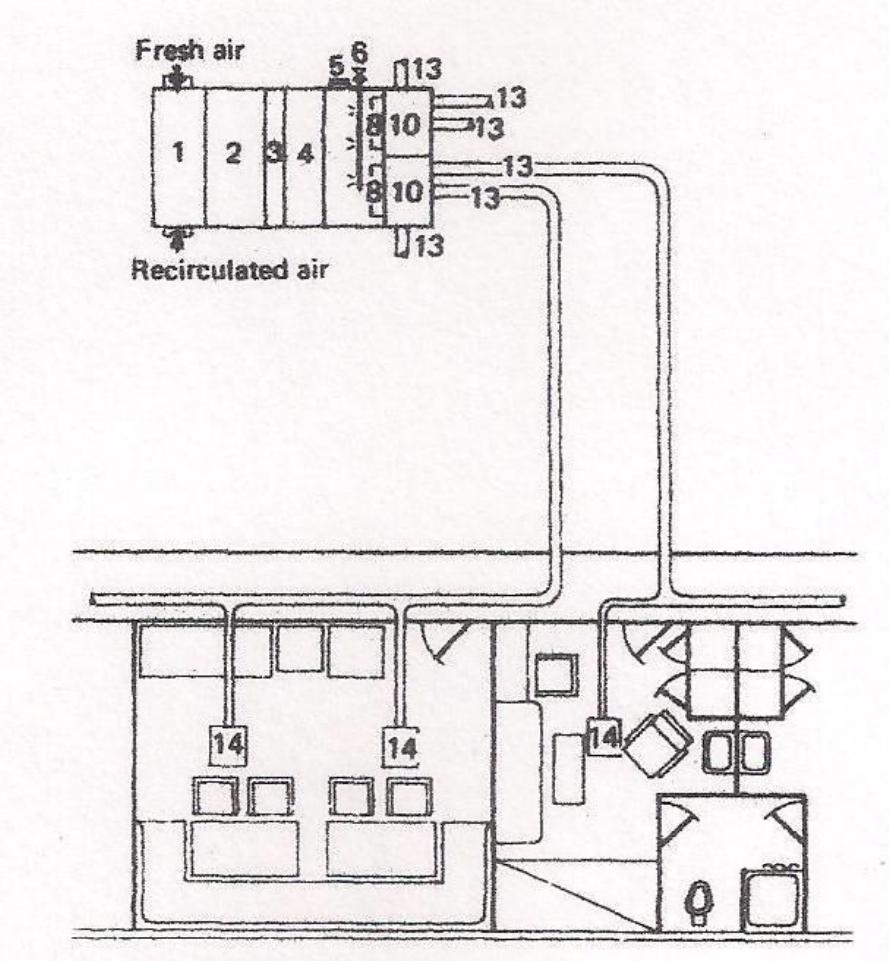

In [35]:
import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources.invoke("tell me about SINGLE DUCT SYSTEM")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    if hasattr(text, "page_content"):
        print(text.page_content)
    elif hasattr(text, "text"):
        print(text.text)
    else:
        print(str(text))
    
    # ✅ FIX: use getattr() instead of "in"
    page_number = getattr(text.metadata, "page_number", None)
    if page_number is not None:
        print("Page number:", page_number)

    print("\n" + "-" * 50 + "\n")


print("🖼️ Context Images:")
for image in response['context']['images']:
    display_base64_image(image)


🧠 Response:
 A Compact Air Conditioning Unit has its compressor, condenser, expansion valve, fan, filter, cooler, and plenum chamber all housed within a single casing.

Key features include:
*   **Compressor:** A sealed unit.
*   **Condenser:** Cooled by sea water and arranged to have two or four passes. It also functions as a receiver, equipped with a double-ported valve on the outlet for charging the refrigerant, and a fusible plug to prevent overpressure.
*   **Refrigerant flow:** After the expansion valve, refrigerant goes to a cooler through a distributor.
*   **Filter:** Essential for keeping the fin-type cooler clean, it is usually made of a terylene fibre mat and is easily removed for periodic cleaning.
*   **Fan:** Draws air through the cooler and delivers it into a plenum chamber.
*   **Typical location:** This unit is generally equipped in the engine control room.

📚 Context Texts:
REHEAT SYSTEM

* In winter, the air is preheated at the central unit, its temperature being au

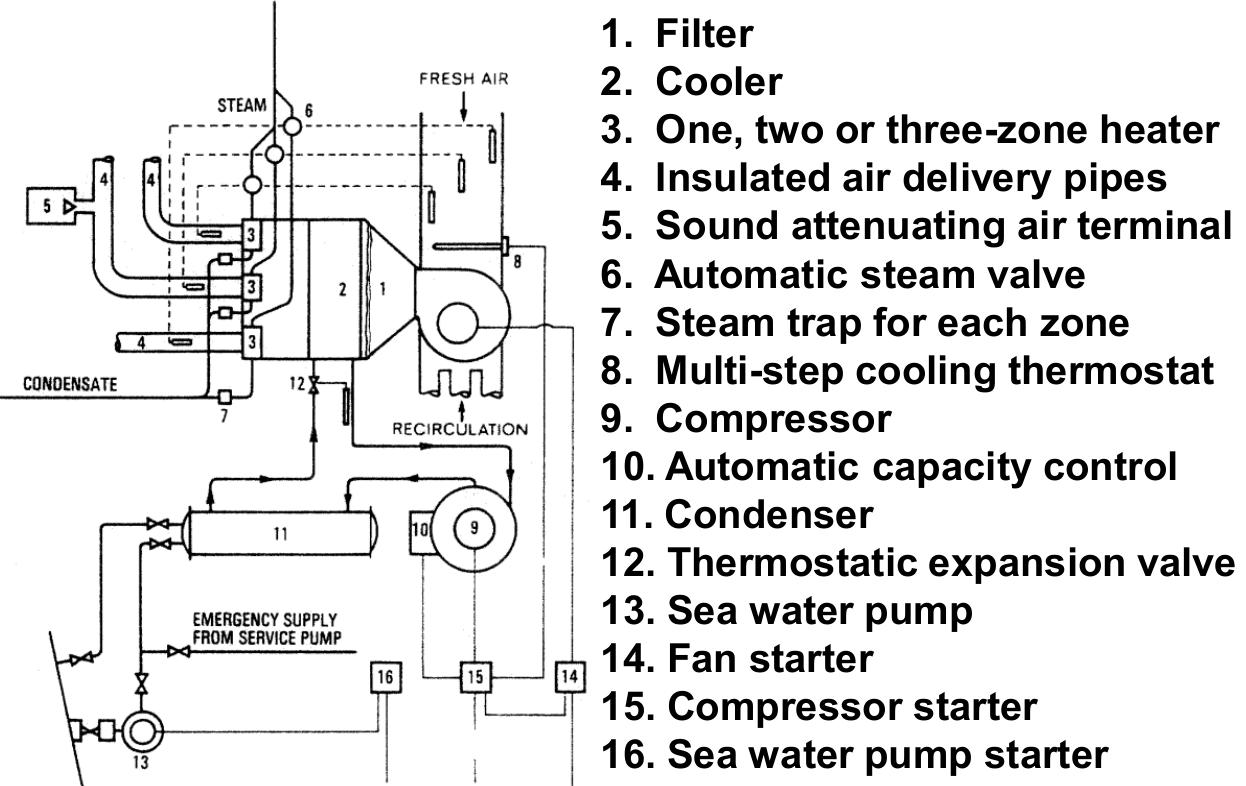

In [36]:
import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources.invoke("tell me about COMPACT AIR CONDITIONING UNIT")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    if hasattr(text, "page_content"):
        print(text.page_content)
    elif hasattr(text, "text"):
        print(text.text)
    else:
        print(str(text))
    
    # ✅ FIX: use getattr() instead of "in"
    page_number = getattr(text.metadata, "page_number", None)
    if page_number is not None:
        print("Page number:", page_number)

    print("\n" + "-" * 50 + "\n")


print("🖼️ Context Images:")
for image in response['context']['images']:
    display_base64_image(image)


🧠 Response:
 A Psychrometric Chart is defined as a plot of humidity ratio (partial vapour pressure) to the base of dry bulb temperature. It is used to determine the state point of an air sample if any two properties are known, allowing the remaining data to be readily obtained. This chart also graphically represents changes in air properties during air conditioning processes like heating and humidification or cooling and dehumidification. The parameters that can be read from the chart include dry bulb temperature, wet bulb temperature, saturation temperature, relative humidity, absolute humidity, specific volume of air, partial pressure of water vapour, and specific enthalpy. It is constructed based on standard air at a barometric pressure of 760 mm of Hg or 1.013 bar, 20°C, and 50% relative humidity.

The dry bulb temperature scale is along the abscissa because, as stated in the context, "The dry bulb temperature (t) scale is along abscissa and lines of constant dry bulb temperature e

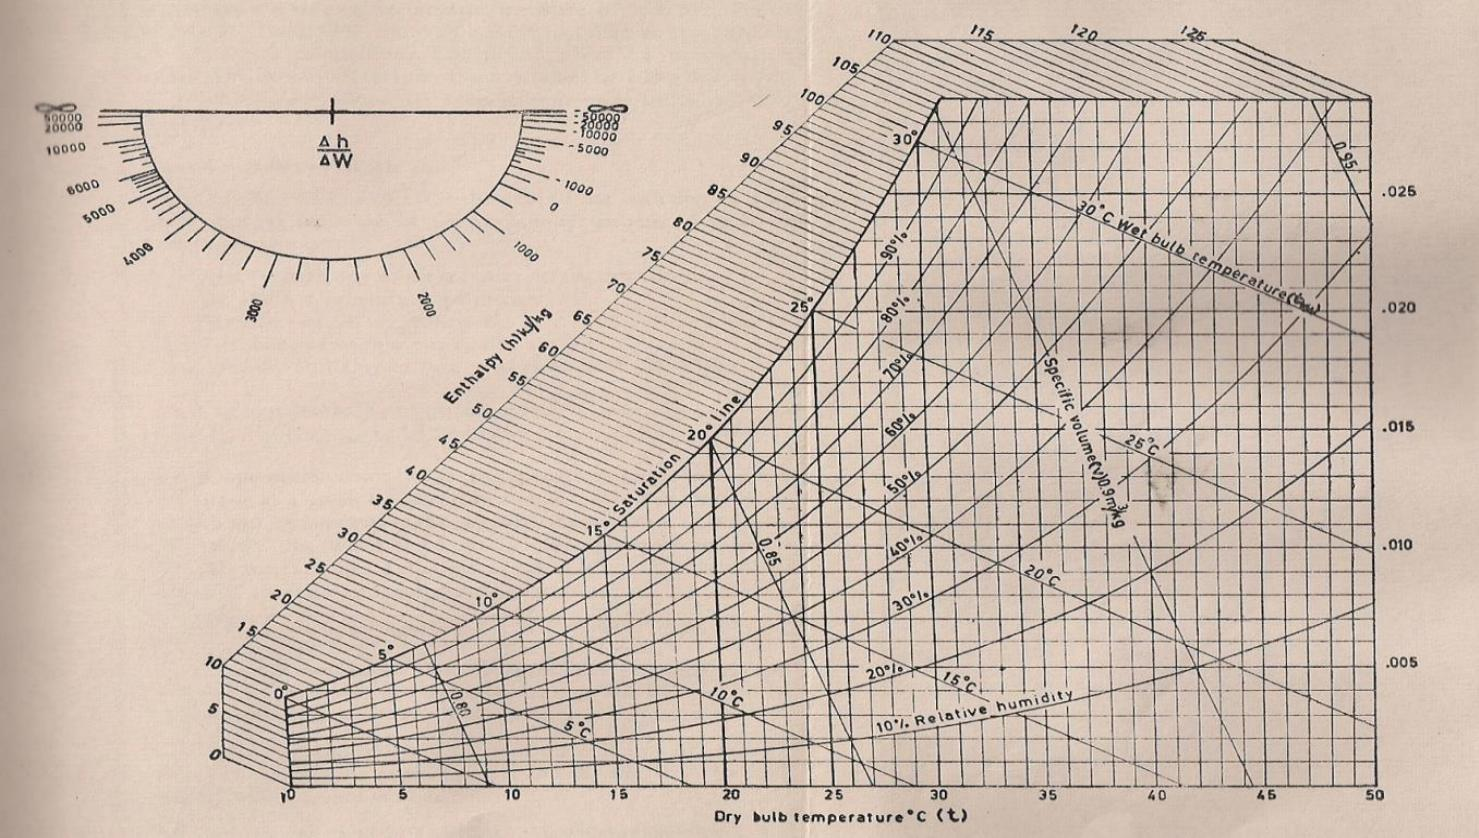

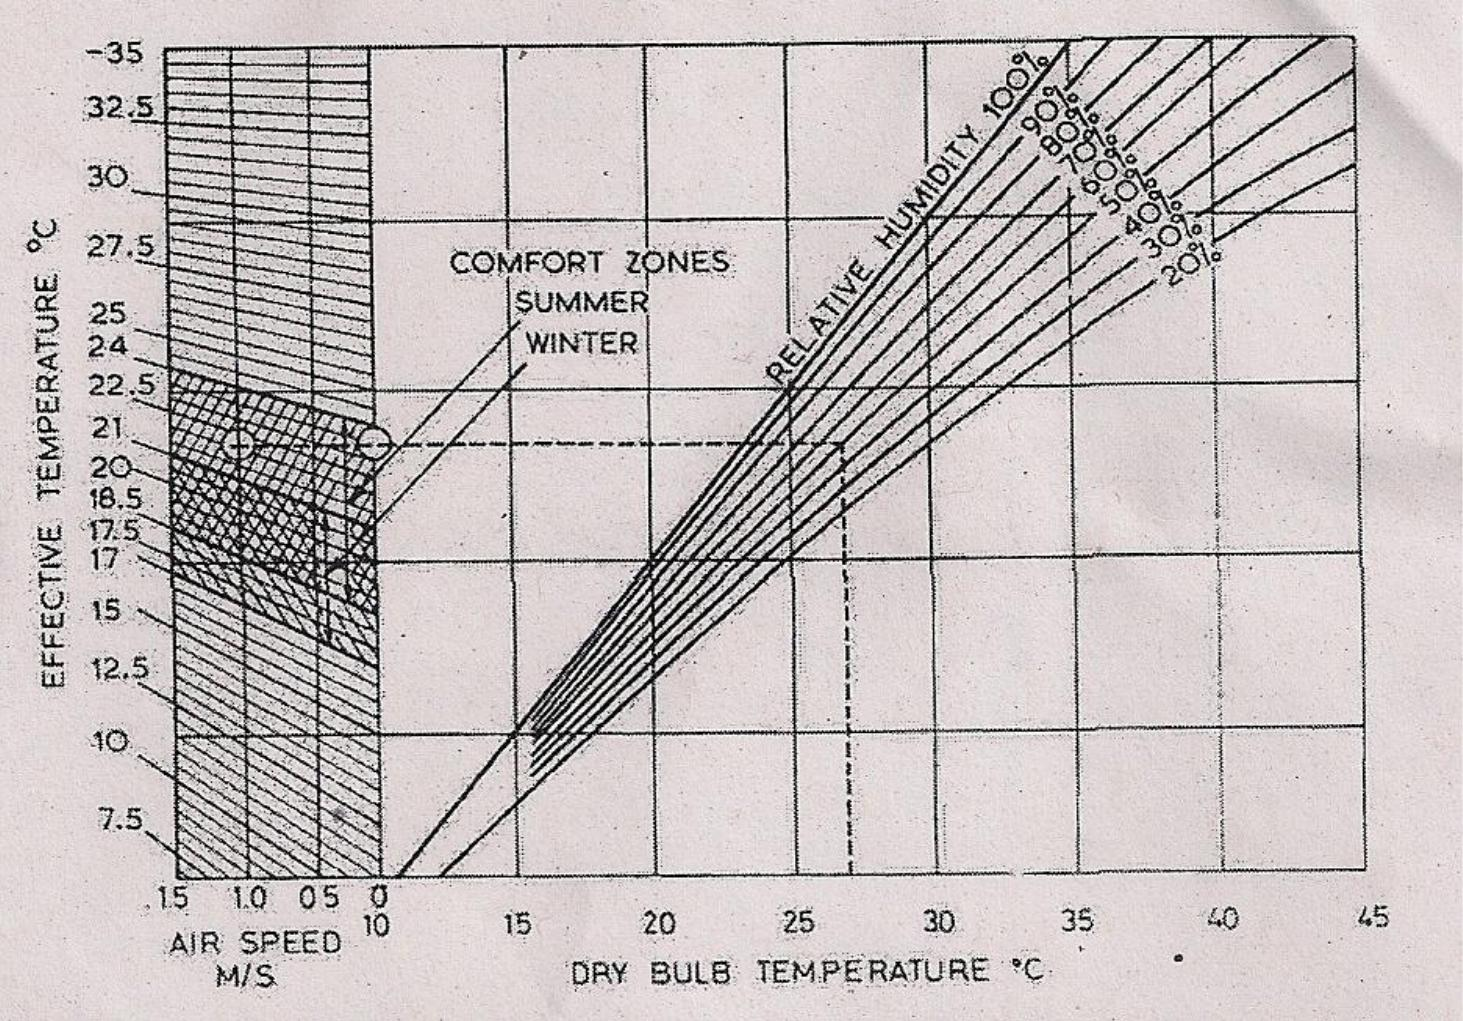

In [37]:
import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources.invoke("explain what is PSYCHROMETRIC CHART and how dry bulb temperature scale is along abscissa")

# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    if hasattr(text, "page_content"):
        print(text.page_content)
    elif hasattr(text, "text"):
        print(text.text)
    else:
        print(str(text))
    
    # ✅ FIX: use getattr() instead of "in"
    page_number = getattr(text.metadata, "page_number", None)
    if page_number is not None:
        print("Page number:", page_number)

    print("\n" + "-" * 50 + "\n")


print("🖼️ Context Images:")
for image in response['context']['images']:
    display_base64_image(image)


In [45]:
import base64
from IPython.display import Image, display

def display_base64_image(b64_str):
    """Display base64 image in Jupyter or VSCode notebooks."""
    image_bytes = base64.b64decode(b64_str)
    display(Image(data=image_bytes))

# Invoke the chain
response = chain_with_sources.invoke("explain MACHINERY SPACE VENTILATION in detail")
# Print response text
print("🧠 Response:\n", response['response'])

print("\n📚 Context Texts:")
for text in response['context']['texts']:
    if hasattr(text, "page_content"):
        print(text.page_content)
    elif hasattr(text, "text"):
        print(text.text)
    else:
        print(str(text))
    
    # ✅ FIX: use getattr() instead of "in"
    page_number = getattr(text.metadata, "page_number", None)
    if page_number is not None:
        print("Page number:", page_number)

    print("\n" + "-" * 50 + "\n")


print("🖼️ Context Images:")
for image in response['context']['images']:
    display_base64_image(image)


🧠 Response:
 MACHINERY SPACE VENTILATION

Machinery space ventilation is crucial for the safe and efficient operation of a ship's machinery and the well-being of its personnel. It serves several key purposes:

**Purpose of Machinery Space Ventilation:**
*   **Combustion Air Supply:** To provide internal combustion engines and boilers with the necessary amount of fresh, clean air for efficient fuel combustion.
*   **Machinery Protection:** To minimize the wear of moving parts of machinery by abrasion, likely by providing clean air and preventing excessive heat buildup.
*   **Heat and Moisture Removal:** To remove excessive heat, moisture, fumes, and gases generated within the engine room.
*   **Ambient Conditions:** To create proper ambient conditions for the safe operation of machinery.
*   **Working Conditions:** To create tolerable working conditions for the personnel.

**Air Requirement Calculation:**
The air requirement for internal combustion engines and boilers is determined usin

In [47]:
import pkg_resources

for pkg in pkg_resources.working_set:
    print(f"{pkg.project_name}=={pkg.version}")


MarkupSafe==2.1.5
accelerate==1.11.0
aiofiles==25.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
annotated-doc==0.0.3
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
asttokens==3.0.0
async-timeout==4.0.3
attrs==25.4.0
backoff==2.2.1
bcrypt==5.0.0
beautifulsoup4==4.14.2
build==1.3.0
cachetools==6.2.1
certifi==2025.10.5
cffi==2.0.0
charset-normalizer==3.4.4
chromadb==1.3.3
click==8.3.0
colorama==0.4.6
coloredlogs==15.0.1
comm==0.2.3
contourpy==1.3.2
cryptography==46.0.3
cycler==0.12.1
dataclasses-json==0.6.7
debugpy==1.8.17
decorator==5.2.1
deprecated==1.3.1
distro==1.9.0
durationpy==0.10
effdet==0.4.1
einops==0.8.1
emoji==2.15.0
et-xmlfile==2.0.0
exceptiongroup==1.3.0
executing==2.2.1
fastapi==0.121.0
filelock==3.19.1
filetype==1.2.0
flatbuffers==25.9.23
fonttools==4.60.1
frozenlist==1.8.0
fsspec==2025.9.0
google-ai-generativelanguage==0.6.18
google-api-core==2.28.1
google-api-python-client==2.186.0
google-auth==2.42.1
google-auth-httplib2==0.2.1
google-

C:\Users\IR - CP 15\AppData\Local\Temp\ipykernel_8240\1243049106.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [48]:
conda list


# packages in environment at c:\miniconda\envs\pdf_quiz:
#
# Name                                      Version          Build            Channel
accelerate                                  1.11.0           pypi_0           pypi
aiofiles                                    25.1.0           pypi_0           pypi
aiohappyeyeballs                            2.6.1            pypi_0           pypi
aiohttp                                     3.13.2           pypi_0           pypi
aiosignal                                   1.4.0            pypi_0           pypi
annotated-doc                               0.0.3            pypi_0           pypi
annotated-types                             0.7.0            pypi_0           pypi
antlr4-python3-runtime                      4.9.3            pypi_0           pypi
anyio                                       4.11.0           pypi_0           pypi
asttokens                                   3.0.0            pyhd8ed1ab_1     conda-forge
async-timeout     

In [19]:
%pip install -Uq langchain-community

Note: you may need to restart the kernel to use updated packages.


In [2]:
import langchain
print(f"LangChain version: {langchain.__version__}")

LangChain version: 1.0.3


In [1]:
import langchain
print(f"LangChain version: {langchain.__version__}")

# Check if the module exists
from langchain.retrievers import multi_vector
print(f"✅ MultiVectorRetriever module found at: {multi_vector.__file__}")

LangChain version: 0.3.27


c:\miniconda\envs\pdf_quiz\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ MultiVectorRetriever module found at: c:\miniconda\envs\pdf_quiz\lib\site-packages\langchain\retrievers\multi_vector.py


In [2]:
# # Run this to see where MultiVectorRetriever actually is
# import pkgutil
# import langchain
# import langchain_community

# print("Searching for MultiVectorRetriever in langchain packages...")

# # Search in langchain
# for importer, modname, ispkg in pkgutil.walk_packages(path=langchain.__path__, prefix='langchain.'):
#     if 'retriever' in modname.lower():
#         print(f"Found: {modname}")

# # Search in langchain_community
# for importer, modname, ispkg in pkgutil.walk_packages(path=langchain_community.__path__, prefix='langchain_community.'):
#     if 'retriever' in modname.lower():
#         print(f"Found: {modname}")

In [3]:
# %pip uninstall langchain langchain-core langchain-community -y
# %pip install langchain langchain-community langchain-core

In [4]:
# %pip uninstall langchain -y

In [5]:
# %pip install langchain~=0.3.0